In [ ]:
import psycopg2
import pandas as pd

# Database connection details
username = 'test'
password = 'test123'
hostname = '192.168.1.141'
port = '5432'
database_name = 'mydb'

# Establish connection
conn = psycopg2.connect(
    dbname=database_name,
    user=username,
    password=password,
    host=hostname,
    port=port
)

# SQL query
sql_query = "SELECT * FROM nifty;"

# Execute SQL query
cursor = conn.cursor()
cursor.execute(sql_query)

# Fetch all the results
rows = cursor.fetchall()

# Convert to predicted_dfFrame
df = pd.DataFrame(rows, columns=[desc[0] for desc in cursor.description])

# Close cursor and connection
cursor.close()
conn.close()

# Display the DataFrame
print(df)


In [9]:
import psycopg2
import pandas as pd

# Database connection details
username = 'test'
password = 'test123'
hostname = '192.168.1.141'
port = '5432'
database_name = 'mydb'

# Establish connection
conn = psycopg2.connect(
    dbname=database_name,
    user=username,
    password=password,
    host=hostname,
    port=port
)

# SQL query
sql_query = "SELECT  TO_TIMESTAMP(lasttradetime) AT TIME ZONE 'Asia/Kolkata' AS lasttradetime, open,high,low,close,openinterest FROM whole_indices_futures WHERE instrumentidentifier = 'NIFTY10APR2422700CE' order by lasttradetime;"

# Execute SQL query
cursor = conn.cursor()
cursor.execute(sql_query)

# Fetch all the results
rows = cursor.fetchall()

# Convert to DataFrame
df = pd.DataFrame(rows, columns=[desc[0] for desc in cursor.description])

# Close cursor and connection
cursor.close()
conn.close()

# Display the DataFrame
print(df)


            lasttradetime    open    high     low   close  openinterest
0     2024-03-13 11:13:00  212.50  212.50  212.50  212.50             0
1     2024-03-13 11:13:00  212.50  212.50  212.50  212.50             0
2     2024-03-13 11:14:00  212.50  212.50  212.50  212.50             0
3     2024-03-13 11:14:00  212.50  212.50  212.50  212.50             0
4     2024-03-13 11:15:00  212.50  212.50  212.50  212.50             0
...                   ...     ...     ...     ...     ...           ...
13017 2024-04-09 15:28:00   41.85   42.80   41.80   41.80       8715150
13018 2024-04-09 15:29:00   41.85   41.95   40.00   40.00       8715150
13019 2024-04-09 15:29:00   41.85   41.95   40.00   40.00       8715150
13020 2024-04-09 15:30:00   40.00   40.00   40.00   40.00       8715150
13021 2024-04-09 15:30:00   40.00   40.00   40.00   40.00       8715150

[13022 rows x 6 columns]


In [57]:
df.head(5635)

,open,high,low,close,openinterest
lasttradetime,,,,,
2024-03-07 09:48:00,1140.00,1140.00,1140.00,1140.00,0
2024-03-07 09:49:00,1140.00,1140.00,1140.00,1140.00,0
2024-03-07 09:50:00,1140.00,1140.00,1140.00,1140.00,0
2024-03-07 09:51:00,1140.00,1140.00,1140.00,1140.00,0
2024-03-07 09:52:00,1140.00,1140.00,1140.00,1140.00,0
...,...,...,...,...,...
2024-04-02 10:45:00,301.50,301.50,295.10,295.10,423210
2024-04-02 10:46:00,295.10,308.25,295.10,303.60,423210
2024-04-02 10:47:00,301.25,303.60,299.05,301.10,423210


In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.layers import Dense

df.set_index('lasttradetime', inplace=True)
df.fillna(method="ffill", inplace=True)	
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
lookback_window = 100
features = 5
def create_sequences(data, lookback_window):
    X, y = [], []
    for i in range(len(data) - lookback_window - 1): 
        X.append(data[i:(i + lookback_window), :])
        y.append(data[i + lookback_window, 0:5]) 
    return np.array(X), np.array(y)
model = Sequential()
model.add(LSTM(units=200, return_sequences=True, input_shape=(lookback_window, features)))
model.add(LSTM(units=200))
model.add(Dense(200, activation=tf.nn.leaky_relu))
model.add(Dense(units=5)) 
model.compile(loss='mean_squared_error', optimizer='adam')
X, y = create_sequences(df_scaled, lookback_window)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]




model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)
y_pred_original = scaler.inverse_transform(y_pred)
data = pd.DataFrame(y_pred_original, columns=['open', 'high', 'low' ,'close','tradedqty'])
data


NameError: name 'df' is not defined

In [58]:
frequency = 'T'
start_time = '2024-04-02 10:49:00'
end_time = pd.to_datetime(start_time) + pd.DateOffset(minutes=len(data) - 1)
date_range = pd.date_range(start=start_time, end=end_time, freq=frequency)
data['lasttradetime'] = date_range
data.set_index('lasttradetime', inplace=True)
data.to_csv('Lstmm.csv')
data

C:\Users\santh\AppData\Local\Temp\ipykernel_20392\2519351374.py:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  date_range = pd.date_range(start=start_time, end=end_time, freq=frequency)


,open,high,low,close,tradedqty
lasttradetime,,,,,
2024-04-02 10:49:00,298.100494,301.015503,294.191864,297.499237,4.289075e+05
2024-04-02 10:50:00,296.733215,299.595093,292.812073,296.108215,4.287618e+05
2024-04-02 10:51:00,292.509491,295.358032,288.653137,291.971344,4.297760e+05
2024-04-02 10:52:00,287.800049,290.719879,284.026459,287.397797,4.318549e+05
2024-04-02 10:53:00,287.560699,290.601562,283.791534,287.181885,4.338976e+05
...,...,...,...,...,...
2024-04-03 10:12:00,697.901428,701.069519,670.290894,684.400513,1.449091e+06
2024-04-03 10:13:00,683.697205,687.091675,657.145874,671.114441,1.447343e+06
2024-04-03 10:14:00,696.521851,700.122314,669.735413,683.764832,1.448913e+06


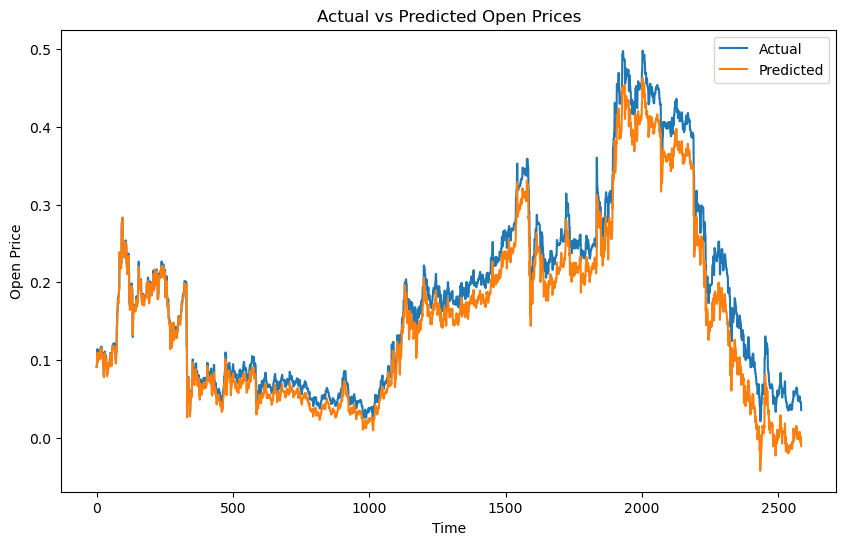

Root Mean Squared Error (RMSE): 0.03289744430434946
Mean Absolute Percentage Error (MAPE): 17.45914883564877


In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Visualize the predicted data
plt.figure(figsize=(10, 6))
plt.plot(y_test[:, 0], label='Actual')
plt.plot(y_pred[:, 0], label='Predicted')
plt.title('Actual vs Predicted Open Prices')
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.legend()
plt.show()

# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)



In [11]:
def generate_predictions(model, last_sequence, num_predictions):
    predictions = []
    current_sequence = last_sequence.reshape(1, lookback_window, features)  # Reshape to match model input shape
    for _ in range(num_predictions):
        next_prediction = model.predict(current_sequence)  # Predict the next data point
        predictions.append(next_prediction[0])  # Append the prediction to the list of predictions
        current_sequence = np.append(current_sequence[:, 1:, :], next_prediction.reshape(1, 1, features), axis=1)  # Update the current sequence
    return predictions

# Generate predictions for the next 60 data points
last_sequence = X_test[-1]  # Using the last sequence from the test data
num_predictions = 720
predicted_data = generate_predictions(model, last_sequence, num_predictions)

# Inverse transform the predictions to obtain the original scale
predicted_data_original = scaler.inverse_transform(predicted_data)

# Create a DataFrame with the predicted values and column names
predicted_df = pd.DataFrame(predicted_data_original, columns=['open', 'high', 'low', 'close', 'volume'])

# Print the predicted data
print(predicted_df)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

In [12]:
frequency = 'T'
start_time = '2024-04-05 15:30:00'
end_time = pd.to_datetime(start_time) + pd.DateOffset(minutes=len(predicted_df) - 1)
date_range = pd.date_range(start=start_time, end=end_time, freq=frequency)
predicted_df['lasttradetime'] = date_range
predicted_df.set_index('lasttradetime', inplace=True)
predicted_df.to_csv('LstmmmP.csv')


predicted_df

C:\Users\santh\AppData\Local\Temp\ipykernel_19220\277512308.py:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  date_range = pd.date_range(start=start_time, end=end_time, freq=frequency)


,open,high,low,close,volume
lasttradetime,,,,,
2024-04-05 15:30:00,31.705275,33.110453,31.901875,31.452136,8.095038e+06
2024-04-05 15:31:00,28.948565,26.021805,26.605414,22.456928,7.894535e+06
2024-04-05 15:32:00,20.417039,16.642923,19.306002,14.028587,7.707490e+06
2024-04-05 15:33:00,13.839884,9.013543,12.891602,6.135807,7.543188e+06
2024-04-05 15:34:00,7.333447,2.018064,6.965265,-0.621305,7.385351e+06
...,...,...,...,...,...
2024-04-06 03:25:00,21.922197,22.148516,21.796879,21.771543,2.680413e+06
2024-04-06 03:26:00,21.922344,22.148659,21.797027,21.771706,2.680404e+06
2024-04-06 03:27:00,21.922496,22.148823,21.797182,21.771866,2.680395e+06


In [62]:
print(df)
print(data)
print(predicted_df)



                        open     high      low    close  openinterest
lasttradetime                                                        
2024-03-07 09:48:00  1140.00  1140.00  1140.00  1140.00             0
2024-03-07 09:49:00  1140.00  1140.00  1140.00  1140.00             0
2024-03-07 09:50:00  1140.00  1140.00  1140.00  1140.00             0
2024-03-07 09:51:00  1140.00  1140.00  1140.00  1140.00             0
2024-03-07 09:52:00  1140.00  1140.00  1140.00  1140.00             0
...                      ...      ...      ...      ...           ...
2024-04-05 15:26:00   705.40   712.00   704.00   712.00       1889835
2024-04-05 15:27:00   711.95   717.70   704.30   704.30       1889835
2024-04-05 15:28:00   702.95   707.90   699.05   707.90       1907715
2024-04-05 15:29:00   707.90   714.60   705.10   714.60       1907715
2024-04-05 15:30:00   715.00   715.00   715.00   715.00       1907715

[7044 rows x 5 columns]
                           open        high         low       clo

In [63]:
import matplotlib.pyplot as plt 
import pandas as pd

# Load datasets
bank_data = df
lstmm_data = data
lstmm_Pdata = predicted_df


# Convert 'Datetime' columns to datetime objects
bank_data['lasttradetime'] = pd.to_datetime(bank_data['lasttradetime'])
lstmm_data['lasttradetime'] = pd.to_datetime(lstmm_data['lasttradetime'])
lstmm_Pdata['lasttradetime'] = pd.to_datetime(lstmm_Pdata['lasttradetime'])

# Sort datasets by 'Datetime' column
bank_data.sort_values(by='Datetime', inplace=True)
lstmm_data.sort_values(by='lasttradetime', inplace=True)

# Plot bank data
plt.plot(bank_data['lasttradetime'], bank_data['close'], label='Bank Data')

# Plot Lstmm data on top of bank data
plt.plot(lstmm_data['lasttradetime'], lstmm_data['close'], label='Lstmm Data')
plt.plot(lstmm_Pdata['lasttradetime'], lstmm_Pdata['close'], label='LstmmP Data')

# Labeling and legend
plt.xlabel('Time')
plt.ylabel('Close Value')
plt.legend()

# Show plot
plt.show()


KeyError: 'lasttradetime'

In [39]:
import psycopg2
import pandas as pd

# Database connection details
username = 'test'
password = 'test123'
hostname = '192.168.1.141'
port = '5432'
database_name = 'mydb'

# Establish connection
conn = psycopg2.connect(
    dbname=database_name,
    user=username,
    password=password,
    host=hostname,
    port=port
)

# Sample DataFrame (replace this with your actual data)
predicted_df = pd.DataFrame({
    'lasttradetime': ['2024-04-05 15:30:00', '2024-04-05 15:31:00'],
    'data_column': [1, 2]
})

# Define the table name in the database
table_name = 'predicted_banknifty'

# Insert data into the PostgreSQL database
try:
    cursor = conn.cursor()
    
    # Insert data into the table
    for index, row in predicted_df.iterrows():
        cursor.execute('''
            INSERT INTO {} (lasttradetime, data_column)
            VALUES (%s, %s)
        '''.format(table_name), (row['lasttradetime'], row['data_column']))
    
    # Commit the transaction
    conn.commit()
    print("Data inserted successfully!")

except (Exception, psycopg2.DatabaseError) as error:
    print("Error: %s" % error)
    conn.rollback()

finally:
    # Close the cursor and database connection
    if cursor is not None:
        cursor.close()
    if conn is not None:
        conn.close()


Error: column "data_column" of relation "predicted_banknifty" does not exist
LINE 2: ...  INSERT INTO predicted_banknifty (lasttradetime, data_colum...
                                                             ^



In [34]:
print(predicted_df.columns)


Index(['lasttradetime', 'data_column'], dtype='object')


In [ ]:
import psycopg2
import pandas as pd

# Database connection details
username = 'test'
password = 'test123'
hostname = '192.168.1.141'
port = '5432'
database_name = 'mydb'

# Establish connection
conn = psycopg2.connect(
    dbname=database_name,
    user=username,
    password=password,
    host=hostname,
    port=port
)

# Create a cursor object
cur = conn.cursor()

# Define the table name
table_name = 'predicted_data'

# Create a table if it doesn't exist
create_table_query = f"""
CREATE TABLE IF NOT EXISTS {table_name} (
    id SERIAL PRIMARY KEY,
    open NUMERIC,
    high NUMERIC,
    low NUMERIC,
    close NUMERIC,
    tradedqty NUMERIC
);
"""
cur.execute(create_table_query)
conn.commit()

# Insert predicted data into the database
for index, row in predicted_df.iterrows():
    insert_query = f"""
    INSERT INTO {table_name} (open, high, low, close, tradedqty)
    VALUES ({row['open']}, {row['high']}, {row['low']}, {row['close']}, {row['tradedqty']});
    """
    cur.execute(insert_query)
    conn.commit()

# Close cursor and connection
cur.close()
conn.close()
